# Machine Learning introduction

We learn about the machine learning approach using regression and classification algorithms.We consider multiple linear regression and logistic regression for classification, how they are used from the `sklearn` library.

## The data

Let's use a dataset from the UCI Machine Learning Repository that contains different size NACA 0012 airfoils that were exposed to various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

The dataset has the following attributes.
These are the inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels. 

Source: [Airfoil Self-Noise Data Set](http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)

# Multiple Linear Regresssion

### The goal

The goal is to predict the pressure level, in decibles from the given input variables using multiple linear regression.

### Import libraries

Import the necessary libraries.

In [3]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
%matplotlib inline 

### Load the data

In [5]:
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=['Frequency(Hz)', 
                                                              'Angle(deg)', 
                                                              'Chord(m)', 
                                                              'Velocity(m/s)',
                                                              'Suction(m)',
                                                              'Pressure(dec)'])

In [6]:
data.head()

,Frequency(Hz),Angle(deg),Chord(m),Velocity(m/s),Suction(m),Pressure(dec)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
data.shape

(1503, 6)

### Explore the data

In [8]:
data.describe()

,Frequency(Hz),Angle(deg),Chord(m),Velocity(m/s),Suction(m),Pressure(dec)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### Visualize the data

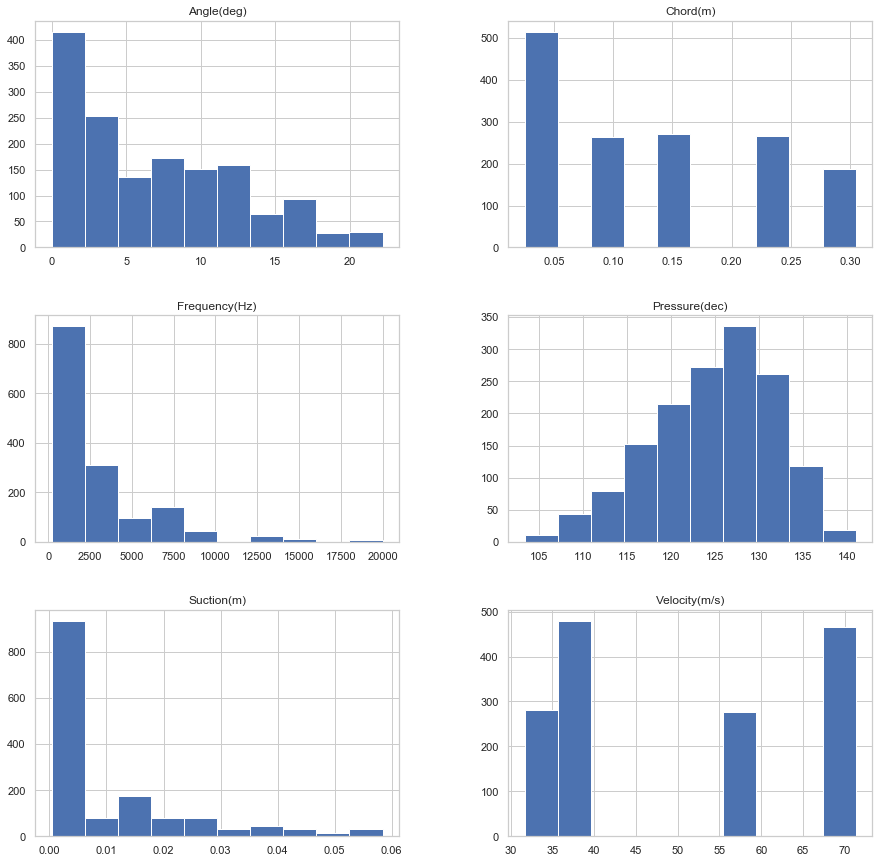

In [9]:
pd.DataFrame.hist(data, figsize = [15,15]);

Data points for all attributes except the `Volume` fall into the same range. No need to rescale the data.

### Split data into training and test sets

Firstly, divide dataset into predictor variables and outcome variable.

In [11]:
X = data.drop(['Pressure(dec)'], axis = 1).values # X are the input (or independent) variables
y = data['Pressure(dec)'].values # Y is output (or dependent) variable

Now split the data into training and test sets. A rule of thumb is to split data into training and test sets by 80/20 or 70/30. To do this, first import the following package:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1202, 5) (1202,)
(301, 5) (301,)


### Fit the model

The `fit()` function fits a linear model. We'll fit the model on the training data.

In [15]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

### Make predictions

We'll predict the dependent variable using the linear model we fitted with the test dataset.

In [16]:
predictions = lm.predict(X_test)

In [17]:
print(predictions[0:5]) # print the first 5 predictions

[120.23558769 122.33905416 128.50918381 121.96868171 132.42385769]


### Plot the model

In [18]:
import matplotlib.pyplot as plt

Don't forget to import the plotting package. 

Now plot the true values against the predictions.

Text(0, 0.5, 'Predictions')

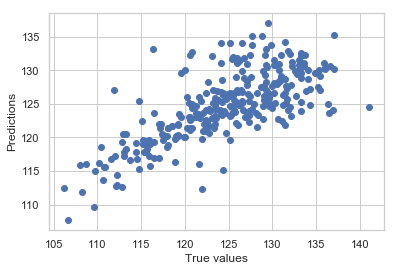

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.ylabel("Predictions")

### Determine model accuracy

In [20]:
print("Score:", model.score(X_test, y_test))

Score: 0.5356191756064217


The `score` is a coefficient of determination $R^2$. It is also known as a goodness-of-fit measure. Put another, $R^2$ is the total variation explained by the model over the total variance. The best possible score is 1.0, which means we are able to predict without errors the dependent variable using our model.
See [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for a description on how the coefficient of determination is calculated.

# Logistic Regression

We now look at how to build a classifier, here a binary classifier, that classifies data points into two classes, 0 or 1.

### The data

The data is experimental data that we'll use to determine room occupancy depending on the temperature, humidity, light and CO2 levels in a room. 
Source: [UCI Machine Learning Repository: Occupancy Detection Data Set](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+).

### The goal

Predict whether a room is occupied or not given the temperature, humidity, light, carbon dioxide and humidity ratio. We'll use logistic regression to solve this problem.

### Load the data

In [21]:
df = pd.read_csv('datatraining.txt')

### Explore the data

In [22]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [23]:
df.shape

(8143, 7)

Because this is time series data and we're not particularly interested in analyses over time, drop the `date` column.

In [24]:
df.drop(['date'], axis=1, inplace=True); df.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,21.05,36.0975,433.0,787.250000,0.005579,1
8140,21.05,35.9950,433.0,789.500000,0.005563,1
8141,21.10,36.0950,433.0,798.500000,0.005596,1
8142,21.10,36.2600,433.0,820.333333,0.005621,1
8143,21.10,36.2000,447.0,821.000000,0.005612,1


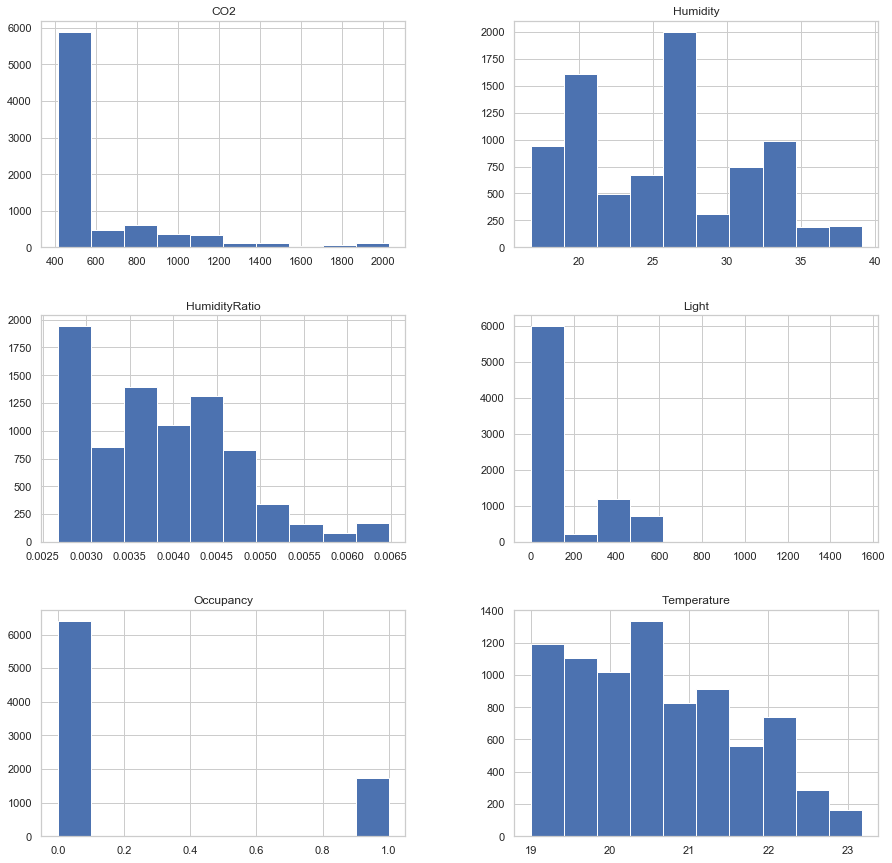

In [26]:
pd.DataFrame.hist(df, figsize = [15,15]); # uncomment and run

In [27]:
df.groupby('Occupancy').count()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,6414,6414,6414,6414,6414
1,1729,1729,1729,1729,1729


In [28]:
df.Occupancy.value_counts() # function 

0    6414
1    1729
Name: Occupancy, dtype: int64

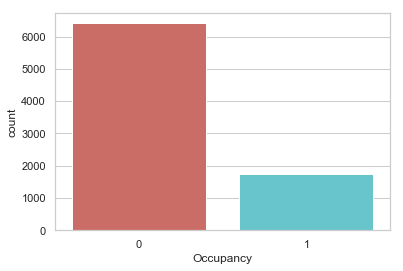

In [29]:
sns.countplot(x='Occupancy',data=df, palette='hls')


### Import the libraries

Import the logistic regression module and metrics module for evaluating.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Put data into matrices.

In [31]:
X = df.drop(['Occupancy'], axis = 1).values # X are the input (or independent) variables
y = df['Occupancy'].values # Y is output (or dependent) variable

In [32]:
print(X[0:5])
print(y[0:5])

[[2.31800000e+01 2.72720000e+01 4.26000000e+02 7.21250000e+02
  4.79298818e-03]
 [2.31500000e+01 2.72675000e+01 4.29500000e+02 7.14000000e+02
  4.78344095e-03]
 [2.31500000e+01 2.72450000e+01 4.26000000e+02 7.13500000e+02
  4.77946352e-03]
 [2.31500000e+01 2.72000000e+01 4.26000000e+02 7.08250000e+02
  4.77150883e-03]
 [2.31000000e+01 2.72000000e+01 4.26000000e+02 7.04500000e+02
  4.75699293e-03]]
[1 1 1 1 1]


### Feature selection

You can use the recursive feature elimination algorithm (among many) to determine those features that are important for predicting the outcome of interest. According to the [sklearn source](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), "the function selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a  feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."

Source: [sklearn.feature_selection.RFE (Recursive Feature Elimination)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [33]:
from sklearn.feature_selection import RFE # import the package

In [34]:
logreg = LogisticRegression(solver='lbfgs') # create the model

In [35]:
selector = RFE(logreg, n_features_to_select=5) # defaults to half the features but we have 5 features, let's use them all
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


In this case all the predictor features or independent variables are equally important in predicting the output variable. So we use all the predictor features.

### Split into training and test datasets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
print('Training data', len(X_train), len(y_train))
print('Test data', len(X_test), len(y_test))

Training data 5700 5700
Test data 2443 2443


We split the data 70-30; i.e., 70% for training and 30% for testing the model

### Fit the model

In [38]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

See [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for a detailed output of what each of the outcome parameters means.

### Predicting with the model

We predict using the test dataset.

In [39]:
y_pred = logreg.predict(X_test)

Then determine the accuracy of the predictions.

In [40]:
print('Accuracy score: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy score: 0.98


### Cross validation

We do cross validation to avoid overfitting. We can determine whether the model generalises well.

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

We use a method called k-Folds cross validation. We divide the training set into k subsets For each k fold, build the model on $k-1$ folds; test on the $k$th fold. Record the error when the model is fitted. This is an iterative process. So repeat until each of the $k$ folds has served as a test set. The average of each of the k-recorded errors is the cross-validation error and is the performance metric.

In [42]:
cv = KFold(n_splits=10); cv

KFold(n_splits=10, random_state=None, shuffle=False)

In [43]:
logreg = LogisticRegression(solver='lbfgs')
results = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy')

In [44]:
print(results)

[0.97719298 0.99122807 0.99649123 0.98421053 0.99298246 0.98421053
 0.99298246 0.98596491 0.98245614 0.9877193 ]


In [45]:
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.988


The result is close to the training accuracy, so we can say the model generalises well.

### Confusion matrix

Why do we use a confusion matrix and what does a confusion matrix tell us? We use a confusion matrix to show how many data points were correctly classified and how many were misclassified.

See this guide for details on confusion matrices: [Simple guide to confusion matrix terminology](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1887   28]
 [  10  518]]


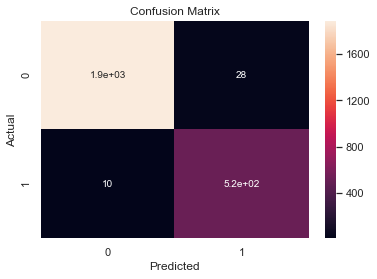

In [47]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax=ax); # annot=True to annotate cells i.e., put numbers in cells
# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

Two predictions that are actually true were classified incorrectly. Recall the size test dataset:

In [48]:
print('Test data', len(y_test))

Test data 2443


The model or classifier was able to accurately classify 1888 data points as occupancy = 1, and 526 with occupancy = 1. The ohter data points were misclassified.

### Precision, Recall and F-1 score

Precision returns the ratio of true positives (i.e., the 00 cell in the confusion matrix, in which tests indicates that the results exists when in fact it does.) That is, $$Precision = \dfrac{\text{true positive}}{\text{true positive + false positive.}}$$ This is the ability of the model to label data points correctly.

The recall rate is is given as $$Recall = \dfrac{\text{true positive}}{\text{true positive + false negative}}.$$ This is the ability of the model to find all the positive (see reference).

The F-1 score is a weighted harmonic mean of the precision and recall. See [Harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean).

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1915
           1       0.95      0.98      0.96       528

   micro avg       0.98      0.98      0.98      2443
   macro avg       0.97      0.98      0.98      2443
weighted avg       0.98      0.98      0.98      2443



### ROC analysis

The receiver operating characteristic curve, or ROC curve,  plots the true positive rate (or recall) against the false positive rate (also called fallout). The red line indicates a base random model. 

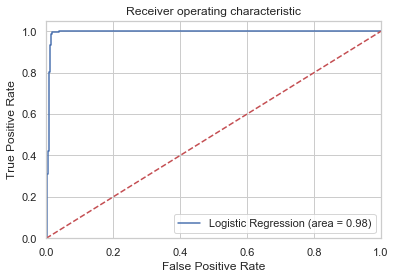

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### References

1. [Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

2. [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall)

3. [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)